In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import svm
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.covariance import EllipticEnvelope
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor

In [ ]:
from google.colab import files
files.upload()

Saving 3k_data.csv to 3k_data.csv


{'3k_data.csv': b'"1,000","3,000","10,000","30,000","100,000",1-level,2-level,3-level,4-level,5-level,6-level,7-level,8-level,9-level,10-level,11-level,12-level,13-level,14-level,15-level,16-level,17-level,18-level,19-level,20-level,benchmark,y\r\n32399.5,32396,32394.8,32390.3,32394.3,32399.5,32397.75,32398,32399,32399,32399.25,32397.5,32397.25,32396,32396.75,32397.5,32397.75,32397.25,32397.25,32397.5,32397.75,32397.75,32398.75,32398.25,32398.5,32396.77,32397.91\r\n32399,32399,32396.5,32394.8,32393,32401.25,32399.25,32399,32399.75,32399.5,32399.5,32399.5,32397,32395.5,32395.75,32395.25,32395.25,32396,32396.5,32396.5,32396.5,32396,32395.75,32396.25,32397.25,32397.91,32391.99\r\n32394.8,32393.8,32390.5,32391,32390.3,32394.75,32393.75,32391,32391,32390.75,32390.75,32390,32389.25,32389.5,32389.5,32389.5,32389.25,32389.25,32389,32390,32390.75,32389.75,32388.25,32388.25,32387.75,32391.99,32389.75\r\n32391.8,32389.8,32389,32386.3,32387.3,32391.75,32390.25,32390.5,32390.25,32390.75,32390.5,323

In [ ]:
data = pd.read_csv(Path("3k_data.csv"))
data
y = data[["y"]]
benchmark = data[["benchmark"]]
X = data.drop(['y', 'benchmark'], axis=1)  
# Divide the data into a test set and a training set
train_X, test_X, train_y, test_y = train_test_split(X, y,shuffle=False)
#print(f"Training_X:\n{train_X}")
#print(f"Training_y:\n{train_y}")
#print(f"Test_X:\n{test_X}")
#print(f"Test_y:{test_y}")

old_data = pd.read_csv(Path("3k_data.csv"))
old_data
old_y = old_data[["y"]]
old_benchmark = old_data[["benchmark"]]
old_X = old_data.drop(['y', 'benchmark'], axis=1)  

Prices    499.889192
dtype: float64


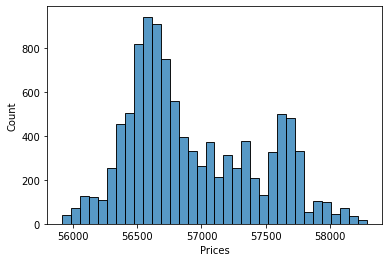

In [ ]:
#new
df = pd.DataFrame(y)
df.rename(columns={'y':'Prices'}, inplace=True)
sns.histplot(data=df,x='Prices')
print(np.std(df))
plt.show()


Prices    215.393119
dtype: float64


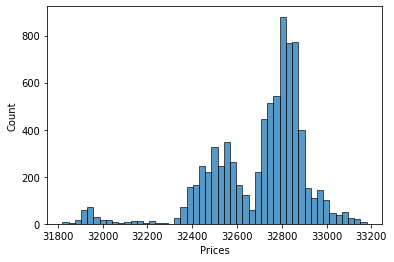

In [ ]:
#old
df = pd.DataFrame(old_y)
df.rename(columns={'y':'Prices'}, inplace=True)
sns.histplot(data=df,x='Prices')
print(np.std(df))
plt.show()


In [ ]:
np.std(old_y["y"])
np.std(y["y"])

499.8891917892743

In [ ]:
#new
sns.histplot(data=old_data,x='y')
plt.show()

In [ ]:
# degree = 1
dg = 1
quadratic_featurizer = PolynomialFeatures(degree=dg)
X_train_quadratic = quadratic_featurizer.fit_transform(X)
#0.01, 0.1 ,1 ,10 , 100,1000,10000
model = DummyRegressor(strategy="mean")
#model = LinearSVC()
scores = cross_val_score(model, X_train_quadratic, y,scoring="neg_mean_absolute_error")
print(abs(scores))
print(np.mean(abs(scores)) )
print(np.std(scores))
#model.fit(X_train_quadratic, y)
#y_hat = model.predict(X_train_quadratic)

#print(f"mean_absolute_error:{mean_absolute_error(y_hat, y)}")

#print(model.coef_)


[141.05514453 142.45729845 222.75083786 107.44589071 401.60966064]
203.06376643717513
106.27233336684989


In [ ]:
X.columns

Index(['1,000', '3,000', '10,000', '30,000', '100,000', '1-level', '2-level',
       '3-level', '4-level', '5-level', '6-level', '7-level', '8-level',
       '9-level', '10-level', '11-level', '12-level', '13-level', '14-level',
       '15-level', '16-level', '17-level', '18-level', '19-level', '20-level'],
      dtype='object')

In [ ]:
ftrs = [(model.coef_[i], X.columns[i]) for i in range(len(X.columns))]
ftrs.sort(reverse=True)
ftrs

[(0.9992995772718178, '3,000'),
 (4.7062993725179764e-05, '100,000'),
 (4.0632026214926903e-05, '10,000'),
 (3.181080433174875e-05, '30,000'),
 (2.8440088335281888e-05, '1-level'),
 (5.704236217970956e-07, '19-level'),
 (0.0, '9-level'),
 (0.0, '8-level'),
 (0.0, '7-level'),
 (0.0, '6-level'),
 (0.0, '5-level'),
 (0.0, '4-level'),
 (0.0, '3-level'),
 (0.0, '20-level'),
 (0.0, '2-level'),
 (0.0, '18-level'),
 (0.0, '17-level'),
 (0.0, '16-level'),
 (0.0, '15-level'),
 (0.0, '14-level'),
 (0.0, '13-level'),
 (0.0, '12-level'),
 (0.0, '11-level'),
 (0.0, '10-level'),
 (0.0, '1,000')]

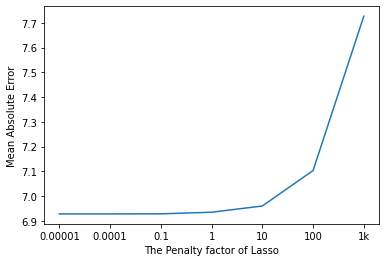

In [ ]:
data = {'The Penalty factor of Lasso':['0.00001','0.0001','0.1','1','10','100','1k'],
       'Mean Absolute Error':[6.9276,6.9276,6.9279,6.9344,6.9596,7.1029,7.7266]}
df = pd.DataFrame(data)

sns.lineplot(x="The Penalty factor of Lasso", y="Mean Absolute Error", data=df)

In [ ]:
#拟合模型求平均误差
quadratic_featurizer = PolynomialFeatures(degree=dg)
X_test_quadratic = quadratic_featurizer.fit_transform(test_X)
y_test_hat = model.predict(X_test_quadratic)
mean_absolute_error(y_test_hat, test_y)

12.831284889433464

In [ ]:
#均方误差
array1 = y_test_hat
array2 = test_y
print(mean_absolute_error(array1, array2))
difference_array = np.subtract(array1, array2)
squared_array = np.square(difference_array)
mse = squared_array.mean()
print(mse)

12.831284889433464
y    319.097886
dtype: float64


In [ ]:
#degree = 1
a1 = abs(difference_array)
df1 = pd.DataFrame(a1)
print(f"Train mean_absolute_error:{mean_absolute_error(y_hat, train_y)}")
print(f"Test mean_absolute_error:{mean_absolute_error(y_test_hat, test_y)}")


Train mean_absolute_error:13.732129791284631
Test mean_absolute_error:12.08720995784381


In [ ]:
#degree = 2
a2 = abs(difference_array)
df2 = pd.DataFrame(a2)
print(f"Train mean_absolute_error:{mean_absolute_error(y_hat, train_y)}")
print(f"Test mean_absolute_error:{mean_absolute_error(y_test_hat, test_y)}")


Train mean_absolute_error:13.69586906069793
Test mean_absolute_error:13.063938598579613


In [ ]:
#degree = 3
a3 = abs(difference_array)
df3 = pd.DataFrame(a3)
print(f"Train mean_absolute_error:{mean_absolute_error(y_hat, train_y)}")
print(f"Test mean_absolute_error:{mean_absolute_error(y_test_hat, test_y)}")

Train mean_absolute_error:11.116700341730285
Test mean_absolute_error:22.247730334601858


In [ ]:
#degree = 4
a4 = abs(difference_array)
df4 = pd.DataFrame(a4)
print(f"Train mean_absolute_error:{mean_absolute_error(y_hat, train_y)}")
print(f"Test mean_absolute_error:{mean_absolute_error(y_test_hat, test_y)}")

Train mean_absolute_error:13.860351680860536
Test mean_absolute_error:12.831284889433464


In [ ]:
#degree = 5
a5 = abs(difference_array)
df5 = pd.DataFrame(a5)
print(f"Train mean_absolute_error:{mean_absolute_error(y_hat, train_y)}")
print(f"Test mean_absolute_error:{mean_absolute_error(y_test_hat, test_y)}")

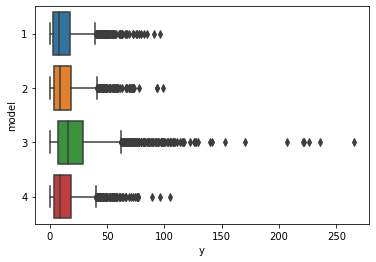

In [ ]:
all_errors = pd.DataFrame()
a = pd.concat([a1[["y"]], a2[["y"]], a3[["y"]], a4[["y"]]])
a.reset_index(drop=True)
a["model"] = ["1"] * len(a1) + ["2"] * len(a2) + ["3"] * len(a3)+ ["4"] * len(a3)


sns.boxplot(y=a["model"] ,x=a["y"] );

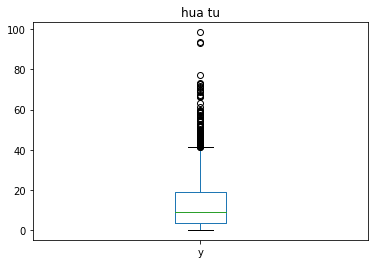

In [ ]:
#箱型图，对于平均方误差
a = abs(difference_array)
df = pd.DataFrame(a)
df.plot.box(title="hua tu")
plt.show()



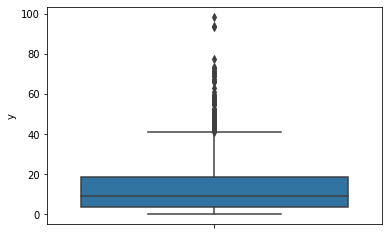

In [ ]:
#显示数据集
df.head()
sns.boxplot(y=df["y"] );


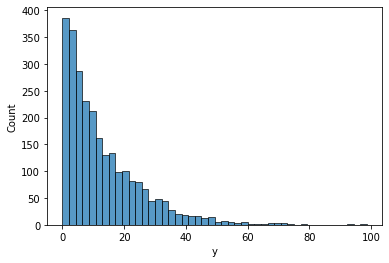

In [ ]:
#对于平均方误差
sns.histplot(data=df,x='y')
plt.show()

In [ ]:
print(np.std(a))
print(np.max(a))
print(np.min(a))

y    8.353424
dtype: float64
y    126.672073
dtype: float64
y    0.000972
dtype: float64


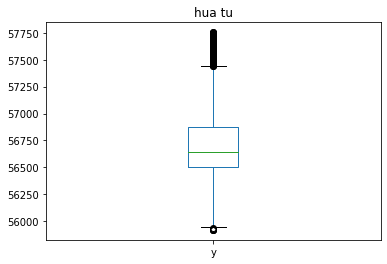

y    381.697742
dtype: float64

In [ ]:
#5000 train 标准差
df = pd.DataFrame(train_y)
df.plot.box(title="hua tu")
plt.show()

np.std(train_y)